In [2]:
from __future__ import print_function


%matplotlib inline

# Modify these to point to your own files
WRF_DIRECTORY = "D:/wonderland/projects/synop_data_project/"\
                    "plot metmaps/wrf/data" 
WRF_FILES = ["wrfout_d01_2005-08-28_00_00_00",
             "wrfout_d01_2005-08-28_12_00_00",
             "wrfout_d01_2005-08-29_00_00_00"]


# Do not modify the code below this line
#------------------------------------------------------
# Turn off annoying warnings
import warnings
warnings.filterwarnings('ignore')

# Make sure the environment is good
import numpy as np
import cartopy
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import os

from wrf import (getvar, interplevel, vertcross, 
                 CoordPair, ALL_TIMES, to_np,
                 get_cartopy, latlon_coords,
                 cartopy_xlim, cartopy_ylim)

_WRF_FILES = [os.path.abspath(os.path.expanduser(
    os.path.join(WRF_DIRECTORY, f))) for f in WRF_FILES]

# Check that the WRF files exist
for f in _WRF_FILES:
    if not os.path.exists(f):
        raise ValueError("{} does not exist. "
            "Check for typos or incorrect directory.")


def single_wrf_file():
    global _WRF_FILES
    return _WRF_FILES[0]

def multiple_wrf_files():
    global _WRF_FILES
    return _WRF_FILES

print("All tests passed!")


All tests passed!


In [9]:
file_path = single_wrf_file()
file_path_2 = multiple_wrf_files()
wrfin = Dataset(file_path)


In [10]:
# TO FIND OUT ALL VARIABLES NAMES:
var_names = wrfin.variables.keys()
print(var_names)

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'QNICE', 'QNRAIN', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'VAR', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P00', 'TLP', 'TISO', 'TLP_STRAT', 'P_STRAT', 'MAX_MST

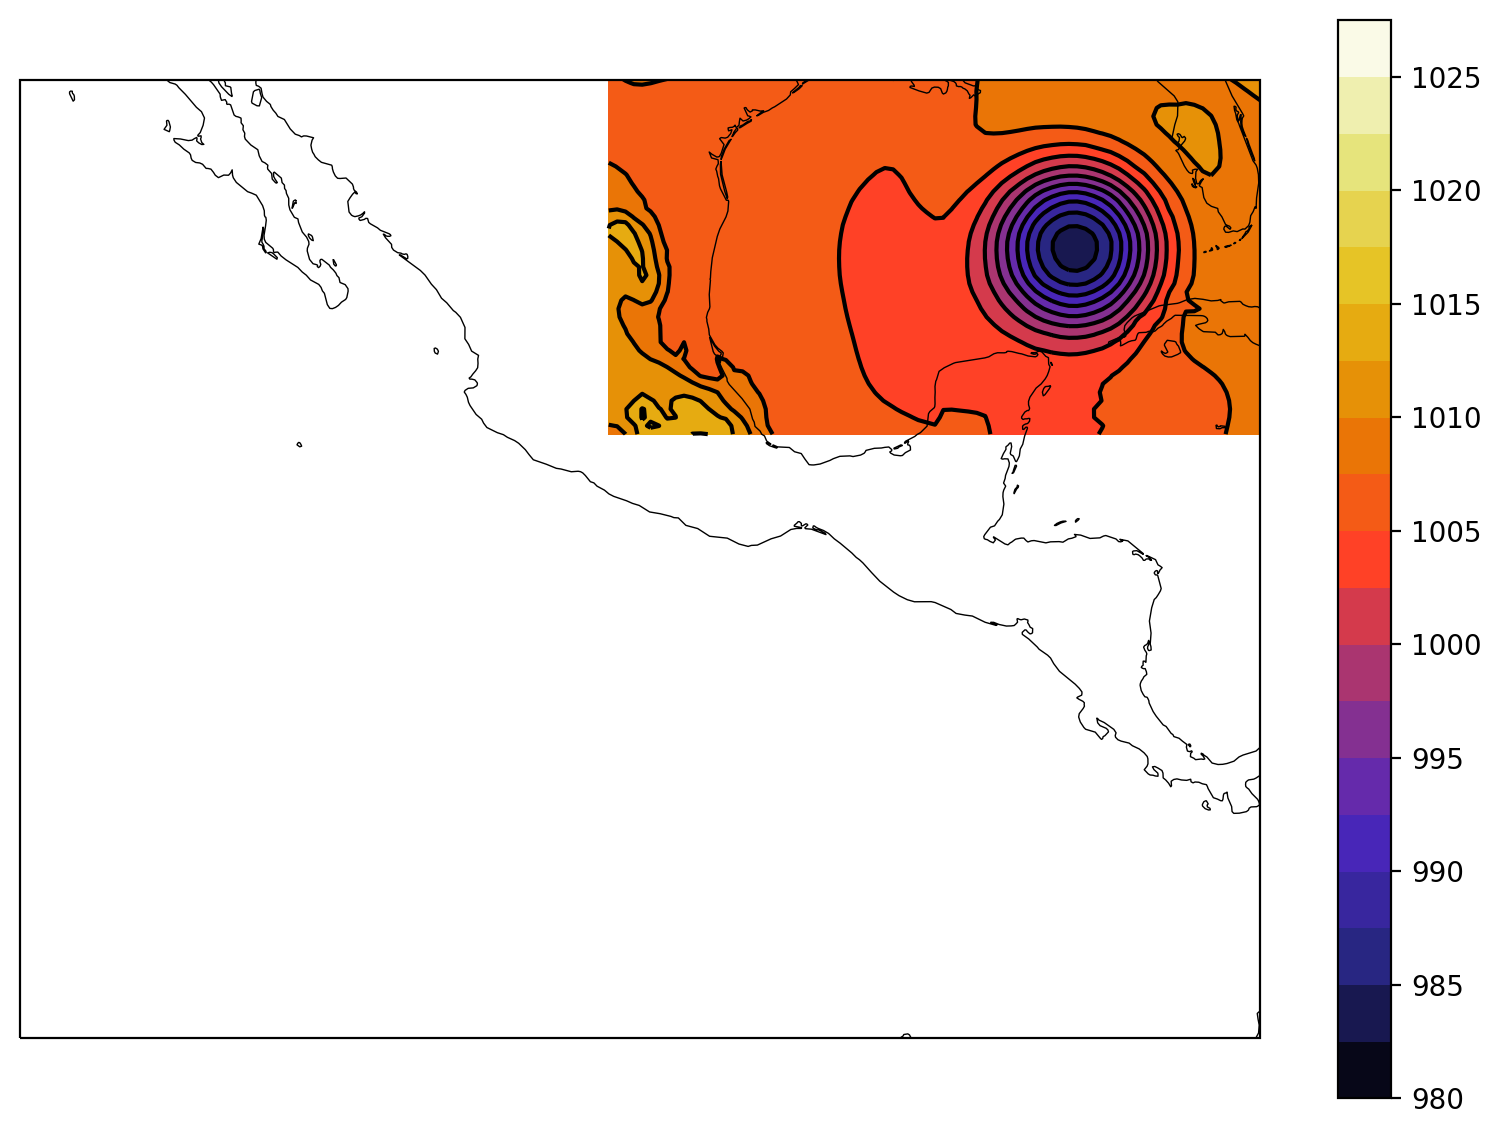

In [11]:
# Use single wrf file for this example
# Extract terrrain height variable "slp" at time index 0 using getvar
slp = getvar(wrfin, 'slp', timeidx=0)

# Extract cartopy object and lat/lon coordinates using get_cartopy and latlon_coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Verify cartopy object and lat/lon coordinates were processed
# print(cart_proj, '\n', lats, '\n', lons)

# Create a figure and axes object
fig = plt.figure(figsize=(10,10), dpi=200)
ax = plt.axes(projection=cart_proj)# Set map projection with cart_proj. What do you notice about the map displayed?

# Add features to axes object 
ax.coastlines(linewidth=0.5)

# Add features to the map like contour lines
# Set contour levels 
lvl = np.arange(980, 1030, 2.5) # Non-inclusive of end value (1030)

# Add contour lines
plt.contour(lons,
            lats,
            slp, 
            levels=lvl,
            colors='k', # 'k' for black
            transform=crs.PlateCarree())

# Add filled contour lines
plt.contourf(lons,
             lats,
             slp,
             levels=lvl,
             transform=crs.PlateCarree(),
             cmap='CMRmap')

# Add colorbar
plt.colorbar(ax=ax, shrink=0.7)


# Manually set extent of map projection
ax.set_extent([-120, -80, 0, 28])

plt.show()

# Is there data missing from this projection?

In [74]:
print(len(a))

166


In [71]:
a = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
for i in a:
    print(i)

Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
flag
flag_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
hot
hot_r
hsv
hsv_r
inferno
inferno_r
jet
jet_r
magma
magma_r
nipy_spectral
nipy

# Overlaying Multiple Diagnostics #
In these examples, we will extract many variables and then overlay all of them on one projection. 

### Dew point temp, sea level pressure, and winds ###

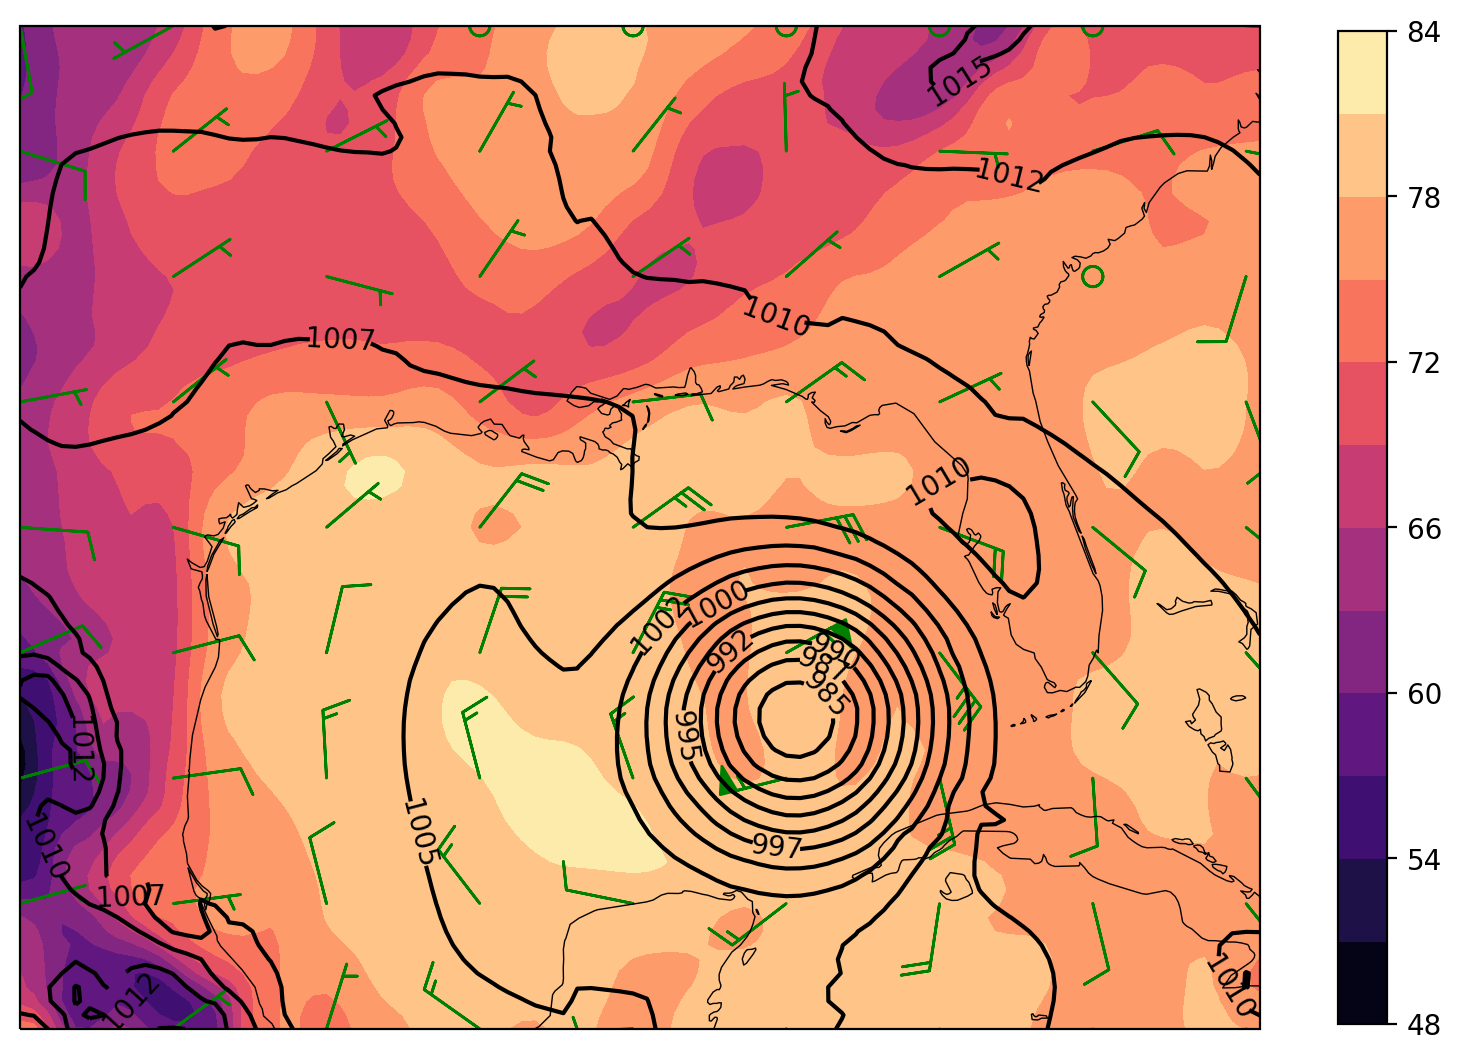

In [12]:
# Use single wrf file for this example
# Get "slp", "td2", "ua", and "va" variables 
slp = getvar(wrfin, "slp", timeidx=0)
td2 = getvar(wrfin, "td2", timeidx=0, units="degF") # Use units "degC"
u_sfc = getvar(wrfin, "ua", timeidx=0, units="kts")[0,:] # subset data to match size of td2 and slp, use units "kts"
v_sfc = getvar(wrfin, "va", timeidx=0, units="kts")[0,:]

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Create a figure and get the axes object
fig = plt.figure(figsize=(10, 7.5), dpi=200)
ax = plt.axes(projection=cart_proj)

# Add projection features
ax.coastlines(linewidth=0.5)

# Manually setting the contour levels
slp_levels = np.arange(980, 1030, 2.5)
td2_levels = np.arange(48, 85, 3)

# Make sea level pressure contour lines.
slp_contours = plt.contour(lons,
                           lats,
                           slp,
                           levels=slp_levels,
                           colors='k',
                           transform=crs.PlateCarree())

# Make filled countours for 2m dewpoint temperature.
plt.contourf(lons,
             lats,
             td2,
             levels=td2_levels,
             transform=crs.PlateCarree(),
             cmap='magma')

# Plot the wind barbs, but only plot ~7 barbs in each direction.
thin = [int(x/8.) for x in lons.shape]
plt.barbs(to_np(lons[::thin[0], ::thin[1]]), # Why are we using to_np here?
          to_np(lats[::thin[0], ::thin[1]]),
          to_np(u_sfc[::thin[0], ::thin[1]]),
          to_np(v_sfc[::thin[0], ::thin[1]]),
          transform=crs.PlateCarree(),
          color = 'green')

# Add contour labels for pressure
plt.clabel(slp_contours, fmt="%i")

# Manually set extent of map projection
# ax.set_extent([-120, -80, 0, 28])

# Add a color bar
plt.colorbar(ax=ax, shrink=.86, extendrect=True)

plt.show()

### 850 hPa Heights and Winds with interplevel ###

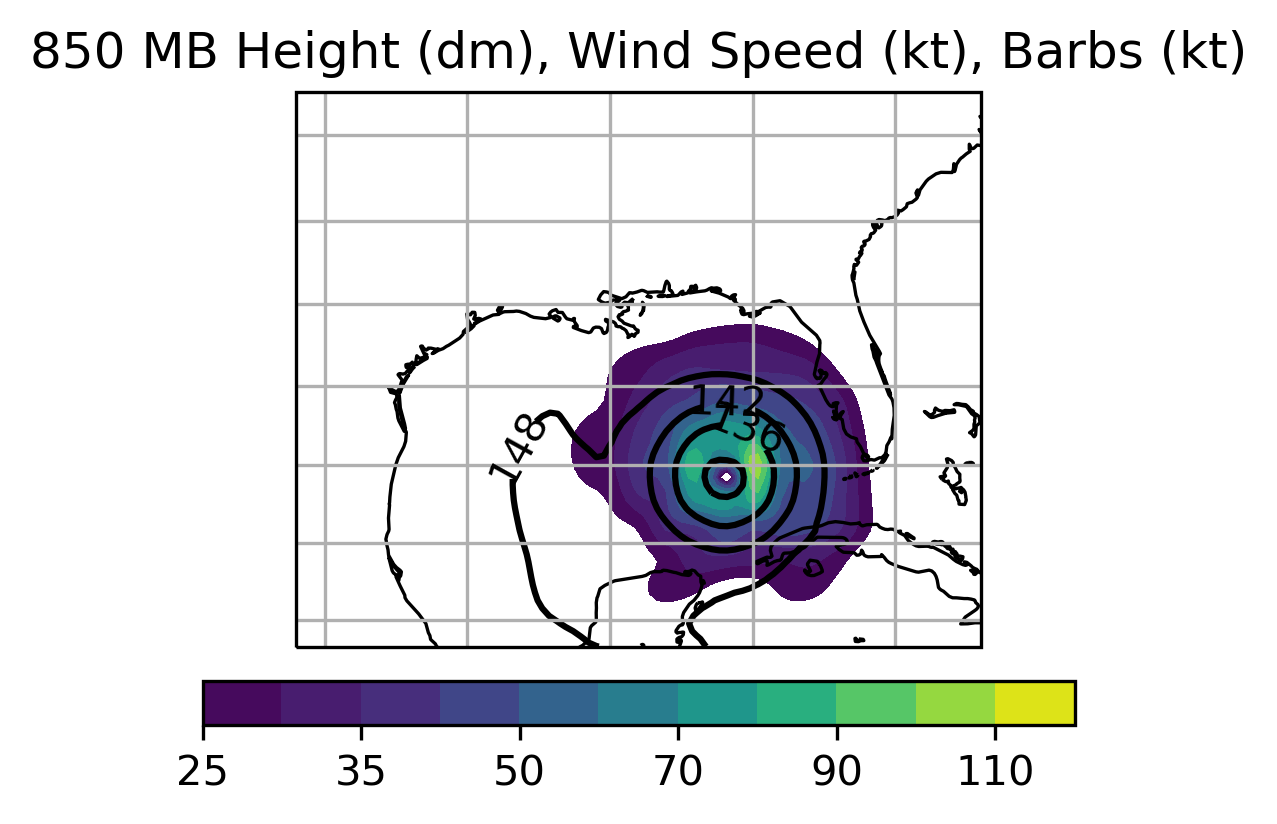

In [13]:
# Use single wrf file for this example
# Extract pressure, height (z), and wind variables
p = getvar(wrfin, "pressure")
z = getvar(wrfin, "z", units="dm")
ua = getvar(wrfin, "ua", units="kt")
va = getvar(wrfin, "va", units="kt")
wspd = getvar(wrfin, "wspd_wdir", units="kt")[0,:]

# Interpolate height, u and v winds, and windspeed to 850 hPa
ht_850 = interplevel(z, p, 850) 
u_850 = interplevel(ua, p, 850)
v_850 = interplevel(va, p, 850)
wspd_850 = interplevel(wspd, p, 850)

# Get the lat/lon coordinates using ht_850
lats, lons = latlon_coords(ht_850)

# Get the map projection information using ht_850
cart_proj = get_cartopy(ht_850)

# Create the figure
fig = plt.figure(figsize=(5, 3), dpi=300)
ax = plt.axes(projection=cart_proj)

# Add coastlines to the projection
ax.coastlines(linewidth=0.8)

# Add the 850 hPa geopotential height contour lines
levels = np.arange(130., 170., 6.)
contours = plt.contour(lons,
                       lats,
                       ht_850,
                       levels=levels,
                       colors="black",
                       zorder=1,
                       transform=crs.PlateCarree())

plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed filled contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120] # Why not use np.arange/np.linspace?

wspd_contours = plt.contourf(lons,
                             lats,
                             wspd_850,
                             levels=levels,
                             cmap="viridis",
                             zorder=0,
                             transform=crs.PlateCarree())

plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", 
             pad=.05, shrink=.75)

# Add the 850 hPa wind barbs, only plotting 10 barbs in each direction
# Also, skipping the border barbs.
thin = [int(x/0.7) for x in lons.shape]
plt.barbs(to_np(lons[::thin[0], ::thin[1]]),
          to_np(lats[::thin[0], ::thin[1]]),
          to_np(u_850[::thin[0], ::thin[1]]),
          to_np(v_850[::thin[0], ::thin[1]]),
          transform=crs.PlateCarree(),
          length=6)

ax.gridlines()

plt.title("850 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()
